En esta notebook se habla de

* datos obtenidos para 72 Universidades
* Usar el proceso fuzzy para calcular un fuzzy poset
* Obtener algunos cortes-$\alpha$ 
* Se calculan los posets $m^2$ y $m^3$. Son posets fuzzy, por lo que hay que elegir una forma de hacerlos crisp. Para ello primero usé mayor que los demás, sin ser iguales.
* Se estudian los valores de membresía para extensiones lineales para distintos posets obtenidos: $m^2$, $m^3$ y varios $\alpha$-cut.

In [1]:
using CSV
using DataFrames
using Posets
using Plots
import Statistics: mean, median
using LaTeXStrings
using DelimitedFiles

┌ Info: Precompiling Posets [849245fe-9976-4417-8fcb-b00bf8cb81e3]
└ @ Base loading.jl:1278


In [2]:
function nose(lista)
    x,y = extrema(lista)
    
    [(y - u)/(y-x) for u in lista]
end

nose (generic function with 1 method)

In [3]:
list_dataframes = [DataFrame(CSV.File("data-metro/"*f)) for f in readdir("data-metro")];

In [4]:
nombresbuenos = intersect([l.Univ for l in list_dataframes]...);

In [5]:
nombresbuenos = nombresbuenos[1:20]

20-element Array{String,1}:
 "INV-L3"
 "PAN-L9"
 "CCA-L2"
 "PAN-L5"
 "COT-L8"
 "TAS-L2"
 "PAN-LA"
 "UNI-L3"
 "OBS-L1"
 "CAZ-LB"
 "INS-L1"
 "ZOC-L2"
 "ZAR-L1"
 "CHP-L1"
 "BUE-LB"
 "PAN-L1"
 "MER-L1"
 "NOR-L2"
 "COP-L3"
 "DMA-L3"

In [6]:
data_filtrada = [xxx[([x ∈ nombresbuenos for x in xxx.Univ]),:] for xxx in list_dataframes]

365-element Array{DataFrame,1}:
 20×2 DataFrame
│ Row │ Univ   │ Points   │
│     │ String │ Float64  │
├─────┼────────┼──────────┤
│ 1   │ INV-L3 │ 138143.0 │
│ 2   │ PAN-L9 │ 125556.0 │
│ 3   │ CCA-L2 │ 124221.0 │
│ 4   │ PAN-L5 │ 113545.0 │
│ 5   │ COT-L8 │ 109212.0 │
│ 6   │ TAS-L2 │ 100415.0 │
│ 7   │ PAN-LA │ 99911.0  │
│ 8   │ UNI-L3 │ 85554.0  │
│ 9   │ OBS-L1 │ 74831.0  │
│ 10  │ CAZ-LB │ 72978.0  │
│ 11  │ INS-L1 │ 71984.0  │
│ 12  │ ZOC-L2 │ 63419.0  │
│ 13  │ ZAR-L1 │ 60683.0  │
│ 14  │ CHP-L1 │ 58169.0  │
│ 15  │ BUE-LB │ 55083.0  │
│ 16  │ PAN-L1 │ 52879.0  │
│ 17  │ MER-L1 │ 48861.0  │
│ 18  │ NOR-L2 │ 48399.0  │
│ 19  │ COP-L3 │ 48325.0  │
│ 20  │ DMA-L3 │ 47577.0  │
 20×2 DataFrame
│ Row │ Univ   │ Points   │
│     │ String │ Float64  │
├─────┼────────┼──────────┤
│ 1   │ INV-L3 │ 131965.0 │
│ 2   │ PAN-LA │ 115124.0 │
│ 3   │ CCA-L2 │ 110933.0 │
│ 4   │ PAN-L9 │ 109107.0 │
│ 5   │ PAN-L5 │ 103906.0 │
│ 6   │ COT-L8 │ 98076.0  │
│ 7   │ TAS-L2 │ 97187.0  │
│ 8   │ ZOC-

In [8]:
puntuaciones = hcat([nose(sort(d, by = first).Points) for d in data_filtrada]...)

20×365 Array{Float64,2}:
 0.917121  0.780073  0.656293   …  0.794301    0.6884     0.743909
 0.991741  1.0       0.81945       0.934276    1.0        0.833684
 0.883047  0.716276  0.734103      0.839154    0.774402   0.702212
 0.719531  0.673343  0.665531      0.681138    0.743895   0.692808
 0.319447  0.372116  0.146321      0.458385    0.453131   0.355447
 0.153722  0.230941  0.0        …  0.00964104  0.0        0.0
 1.0       0.959295  0.887857      0.929601    0.892767   0.961546
 0.730506  0.607822  0.576892      0.739877    0.858436   0.611204
 0.0       0.0       0.226289      0.0         0.0338359  0.00532455
 0.985822  0.816528  0.796988      0.96719     0.596321   0.81634
 0.990924  0.995399  1.0        …  1.0         0.85659    1.0
 0.69907   0.568864  0.428486      0.30465     0.600266   0.52417
 0.941457  0.853795  0.766433      0.918892    0.871986   0.858737
 0.422145  0.3081    0.37005       0.567754    0.393514   0.272305
 0.271603  0.250991  0.157191      0.350384    

In [37]:
show(sort(data_filtrada[2], by = first), allrows=true) 

20×2 DataFrame
│ Row │ Univ   │ Points   │
│     │ String │ Float64  │
├─────┼────────┼──────────┤
│ 1   │ BUE-LB │ 60923.0  │
│ 2   │ COP-L3 │ 40894.0  │
│ 3   │ CAZ-LB │ 66733.0  │
│ 4   │ CHP-L1 │ 70643.0  │
│ 5   │ COT-L8 │ 98076.0  │
│ 6   │ CCA-L2 │ 110933.0 │
│ 7   │ DMA-L3 │ 44601.0  │
│ 8   │ INS-L1 │ 76610.0  │
│ 9   │ INV-L3 │ 131965.0 │
│ 10  │ MER-L1 │ 57603.0  │
│ 11  │ NOR-L2 │ 41313.0  │
│ 12  │ OBS-L1 │ 80158.0  │
│ 13  │ PAN-L1 │ 54209.0  │
│ 14  │ PAN-L5 │ 103906.0 │
│ 15  │ PAN-L9 │ 109107.0 │
│ 16  │ PAN-LA │ 115124.0 │
│ 17  │ TAS-L2 │ 97187.0  │
│ 18  │ UNI-L3 │ 74327.0  │
│ 19  │ ZAR-L1 │ 56342.0  │
│ 20  │ ZOC-L2 │ 87195.0  │

## calculo de posets fuzzy

depende de `puntuaciones`

In [9]:
poset_mn = puntuaciones |> fuzzy;

poset_m3 = puntuaciones |> m3;

poset_m2 = puntuaciones |> m2;

In [14]:
writedlm("figs/poset0p1_metro.dat", αcut_poset(poset_mn, 0.1))
#;./script.wl figs/poset0p1_univ.dat

In [11]:
writedlm("figs/poset0p1_metro_20.dat", αcut_poset(poset_mn, 0.95))
#;./script.wl figs/poset0p1_univ.dat

In [34]:
writedlm("figs/posetm2_metro_20.dat", poset_m2|> pareja_matrizadyacencia)
#;./script.wl figs/poset0p1_univ.dat

In [35]:
;./script.wl figs/posetm2_metro_20.dat

figs/posetm2_metro_20.png


![ejemplo](figs/posetm2_metro_20.png)

La grafica de abajo no me gusta porque muestra que el fuzzy y los cortes $\alpha$ eliminan mucha informacion.

![ejemplo](figs/poset0p1_metro.png)

$$
\mathrm{SH}(\tilde x, \tilde y) =
\left\{\begin{array}{ll}
\frac{\sum_{i} \min \left\{p_{i}(x), p_{i}(y)\right\}}{\sum_{i} p_{i}(x)} & \text { if } \sum_{i} p_{i}(x) \neq 0 \\
1 & \text { otherwise }
\end{array}\right.
$$

In [12]:
writedlm("figs/poset0p55_metro_20.dat", αcut_poset(poset_mn, .5))

In [13]:
;./ninjaSexual.wl figs/poset0p55_metro_20.dat

figs/poset0p55_metro_20.png


![ejemplo](figs/poset0p55_metro_20.png)

In [14]:
writedlm("figs/poset0p35_metro_20.dat", αcut_poset(poset_mn, .35))

In [15]:
;./ninjaSexual.wl figs/poset0p35_metro_20.dat

figs/poset0p35_metro_20.png


![ejemplo](figs/poset0p35_metro_20.png)

In [16]:
writedlm("figs/poset0p10_metro_20.dat", αcut_poset(poset_mn, .1))

In [17]:
;./ninjaSexual.wl figs/poset0p10_metro_20.dat

figs/poset0p10_metro_20.png


![ejemplo](figs/poset0p10_metro_20.png)

#### cosas viejas

In [ ]:
writedlm("/home/david/poset0p1_univ.dat", αcut_poset(poset_mn, .1))

In [ ]:
writedlm("/home/david/poset0p5_univ.dat", αcut_poset(poset_mn, .5))

In [ ]:
writedlm("/home/david/poset0p7_univ.dat", αcut_poset(poset_mn, .7))

In [ ]:
writedlm("/home/david/poset0p95_univ.dat", αcut_poset(poset_mn, .95))

In [ ]:
writedlm("/home/david/poset0p97_univ.dat", αcut_poset(poset_mn, .97))

## Puntuaciones $1/n$

In [23]:
ranks_univs = [sortperm(puntuaciones[:,x], rev = true) for x in 1:365]

365-element Array{Array{Int64,1},1}:
 [7, 2, 11, 10, 13, 1, 3, 19, 20, 8, 4, 12, 18, 14, 17, 5, 15, 6, 16, 9]
 [2, 11, 7, 13, 19, 10, 1, 3, 4, 18, 8, 12, 20, 17, 5, 14, 15, 6, 16, 9]
 [11, 7, 2, 10, 13, 19, 3, 4, 1, 20, 8, 18, 12, 17, 14, 9, 15, 5, 16, 6]
 [2, 11, 7, 3, 13, 8, 1, 19, 4, 14, 18, 5, 12, 17, 10, 15, 16, 20, 9, 6]
 [2, 11, 8, 7, 10, 3, 13, 18, 14, 1, 19, 4, 20, 17, 5, 15, 6, 12, 9, 16]
 [2, 11, 1, 7, 13, 10, 19, 3, 4, 20, 18, 12, 8, 17, 5, 14, 15, 16, 6, 9]
 [2, 11, 7, 13, 8, 19, 1, 18, 3, 4, 5, 14, 10, 15, 16, 17, 12, 20, 9, 6]
 [11, 7, 2, 13, 3, 19, 4, 8, 1, 10, 18, 5, 17, 14, 12, 15, 16, 20, 9, 6]
 [19, 7, 11, 2, 13, 8, 20, 3, 4, 18, 12, 1, 5, 14, 10, 17, 15, 16, 9, 6]
 [11, 7, 2, 13, 19, 8, 1, 3, 12, 18, 4, 10, 14, 17, 5, 15, 16, 20, 6, 9]
 [11, 7, 10, 13, 2, 19, 20, 3, 1, 4, 12, 8, 18, 17, 14, 15, 5, 9, 6, 16]
 [19, 11, 2, 7, 10, 13, 3, 20, 8, 1, 4, 18, 17, 12, 5, 14, 15, 6, 16, 9]
 [2, 11, 10, 7, 13, 1, 3, 19, 20, 4, 8, 12, 18, 17, 14, 5, 15, 16, 6, 9]
 ⋮
 [2, 11, 7,

In [55]:
puntuaciones_preposet = mn(ranks_univs)

72×14 Array{Float64,2}:
 0.0138889  0.0144928  0.0142857  …  0.0153846  0.0153846  0.0147059
 0.0212766  0.0147059  0.0147059     0.015873   0.015625   0.0163934
 0.0181818  0.0175439  0.0196078     0.0175439  0.0178571  0.0169492
 0.0833333  0.0833333  0.0833333     0.0769231  0.0769231  0.0769231
 0.1        0.111111   0.142857      0.125      0.125      0.111111
 0.333333   0.166667   0.166667   …  0.142857   0.142857   0.125
 0.0322581  0.0333333  0.0322581     0.0333333  0.0333333  0.0416667
 1.0        1.0        1.0           1.0        1.0        1.0
 0.0163934  0.0151515  0.0144928     0.0185185  0.0196078  0.0217391
 0.027027   0.0227273  0.0238095     0.0227273  0.0227273  0.0238095
 0.0344828  0.047619   0.047619   …  0.04       0.04       0.0322581
 0.015625   0.0172414  0.015873      0.0149254  0.0149254  0.0142857
 0.0144928  0.0142857  0.0140845     0.0138889  0.0138889  0.0151515
 ⋮                                ⋱                        
 0.0555556  0.0555556  0.05882

In [56]:
poset_mn_old = puntuaciones_preposet |> fuzzy

72×72 Array{Float64,2}:
 1.0       0.907288  0.799924  0.182663  …  0.638782  0.406928  0.157697
 1.0       1.0       0.869652  0.201329     0.704056  0.44851   0.173812
 1.0       0.986375  1.0       0.228351     0.798553  0.508708  0.19714
 1.0       1.0       1.0       1.0          1.0       1.0       0.863322
 1.0       1.0       1.0       1.0          1.0       1.0       0.98087
 1.0       1.0       1.0       1.0       …  1.0       1.0       1.0
 1.0       1.0       1.0       0.406038     1.0       0.89818   0.350541
 1.0       1.0       1.0       1.0          1.0       1.0       1.0
 0.998966  0.960359  0.870929  0.205539     0.708795  0.457888  0.177446
 1.0       1.0       1.0       0.286496     0.923713  0.63824   0.247338
 1.0       1.0       1.0       0.521261  …  1.0       0.95618   0.450016
 0.991207  0.932999  0.83968   0.191742     0.670529  0.427152  0.165535
 0.957991  0.873794  0.770394  0.17592      0.6152    0.391905  0.151876
 ⋮                                     

In [60]:
writedlm("figs/poset0p95_univ_o.dat", αcut_poset(poset_mn_old, .95))

In [61]:
;./script.wl figs/poset0p95_univ_o.dat

figs/poset0p95_univ_o.png


![ejemplo](figs/poset0p95_univ_o.png)

In [64]:
writedlm("figs/poset0p55_univx_o.dat", αcut_poset(poset_mn_old, .55))

In [65]:
;./script.wl figs/poset0p55_univx_o.dat

figs/poset0p55_univx_o.png


![ejemplo](figs/poset0p55_univx_o.png)

# Poset $m^2$ y $m^3$

In [16]:
puntuaciones |> size

(72, 14)

In [17]:
poset_m3 = puntuaciones |> m3;

In [18]:
poset_m3 |> pareja_matrizadyacencia

72×72 Array{Int64,2}:
 0  0  0  0  0  0  0  0  0  0  0  0  1  …  0  0  0  0  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0  0  1  1     0  0  0  0  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0  0  1  1     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  0  0  0  1  0  1  1  1  1  1     1  1  1  1  0  0  0  0  0  1  1  0
 1  1  1  1  0  0  1  0  1  1  1  1  1     1  1  1  1  1  1  0  0  0  1  1  1
 1  1  1  1  1  0  1  0  1  1  1  1  1  …  1  1  1  1  1  1  1  0  0  1  1  1
 1  1  1  0  0  0  0  0  1  1  0  1  1     0  0  0  0  0  0  0  0  0  1  0  0
 1  1  1  1  1  1  1  0  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  0  0  0  0  0  0  0  0  0  0  0  1     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  0  0  0  0  0  1  0  0  1  1     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  0  0  0  1  0  1  1  0  1  1  …  0  0  0  0  0  0  0  0  0  1  0  0
 1  0  0  0  0  0  0  0  0  0  0  0  1     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0    

In [9]:
poset_m2 = puntuaciones |> m2;

In [37]:
poset_m2 |> pareja_matrizadyacencia

72×72 Array{Int64,2}:
 0  0  0  0  0  0  0  0  0  0  0  0  1  …  0  0  0  0  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  1  0  0  1  1     0  0  0  0  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0  0  1  1     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  0  0  0  1  0  1  1  1  1  1     1  1  1  1  0  0  0  0  0  1  1  0
 1  1  1  1  0  0  1  0  1  1  1  1  1     1  1  1  1  1  1  0  0  0  1  1  1
 1  1  1  1  1  0  1  0  1  1  1  1  1  …  1  1  1  1  1  1  1  0  0  1  1  1
 1  1  1  0  0  0  0  0  1  1  0  1  1     0  0  0  0  0  0  0  0  0  1  0  0
 1  1  1  1  1  1  1  0  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  0  0  0  0  0  0  0  0  0  0  0  1     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  0  0  0  0  0  1  0  0  1  1     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  0  0  0  1  0  1  1  0  1  1  …  0  0  0  0  0  0  0  0  0  1  0  0
 1  0  0  0  0  0  0  0  0  0  0  0  1     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0    

In [19]:
writedlm("figs/posetm3_univ.dat", poset_m3 |> pareja_matrizadyacencia)

In [20]:
;./script.wl figs/posetm3_univ.dat

figs/posetm3_univ.png


![ejemplo](figs/poset0p95_univ.png)

![ejemplo](figs/posetm3_univ.png)

In [38]:
writedlm("figs/posetm2_univ.dat", poset_m2 |> pareja_matrizadyacencia)

In [39]:
;./script.wl figs/posetm2_univ.dat

figs/posetm2_univ.png


![ejemplo](figs/posetm2_univ.png)

In [ ]:
writedlm("/home/david/poset0p97_univ_.dat", αcut_poset(poset_m3 |> fuzzy, .97))

In [ ]:
writedlm("/home/david/poset0p85_univ_.dat", αcut_poset(poset_m3 |> fuzzy, .85))

In [ ]:
writedlm("/home/david/poset0p70_univ_.dat", αcut_poset(poset_m3 |> fuzzy, .70))

## Entropia

La entropia $R(A)$ se define a continuacion.
$$
R_{1}(A)=\frac{\sum\!\operatorname{Count}\left(A \cap A^{c}\right)}{\sum\!\operatorname{Count}\left(A \cup A^{c}\right)}
$$
Notar que no es una definicion _probabilistica_. Esta entropia cuantifica que tan borroso es el poset.

El valor maximo de la entropia para un poset borroso de $n$ nodos es
$$
R_{\max} = 
\frac{n(n-1)}{n^2 + n} = \frac{n-1}{n+1}.
$$

In [10]:
poset_m3 = puntuaciones |> m3;

In [11]:
poset_m2 = puntuaciones |> m2;

In [12]:
listaentropia = [fentropia( puntuaciones[:,1:i] |> m3 |> fuzzy ) for i in 2:14]

13-element Array{Float64,1}:
 NaN
   0.1371001901302067
   0.1424805026360095
   0.14455006959320268
   0.1456363237325207
   0.1475103175100581
   0.14656112002600713
   0.14570979538976409
   0.14557250822956175
   0.1468912085201888
   0.1464922338775181
   0.14730969162943783
   0.14679438231231473

In [13]:
listaentropia_m2 = [fentropia( puntuaciones[:,1:i] |> m2 |> fuzzy ) for i in 2:14]

13-element Array{Float64,1}:
 NaN
   0.13658325312210484
   0.14687705511718363
   0.14760787239906348
   0.14877016162377188
   0.1539148243689738
   0.15507028403012363
   0.15484631670540713
   0.15506751600969038
   0.15754431978867467
   0.1573422117307628
   0.1573422117307628
   0.157325441532363

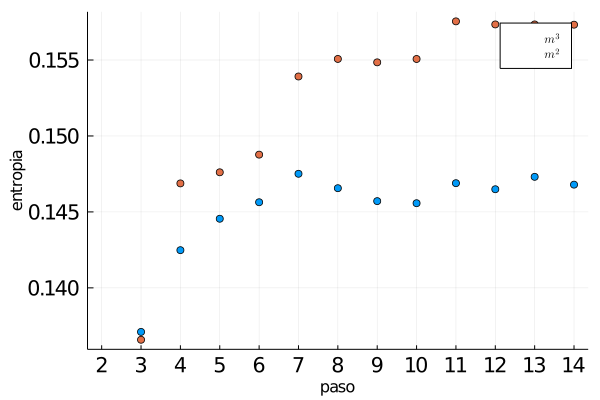

In [14]:
scatter([listaentropia listaentropia_m2],labels = [L"m^3" L"m^2"], xlabel = "paso", ylabel = "entropia", xtickfontsize=14,ytickfontsize=14, xtick = (1:13, 2:14))

# Permutaciones

Las permutaciones sugeridas por el Dr. Pineda.

La motivacion detras de esto es ver que tan estable son los poses bajo algun cambio relativamente pequeño de los posets.

In [54]:
puntuacionpermutada = permpuntuaciones(puntuaciones, 6);

permpuntuaciones realiza 6 permutaciones de las puntuaciones por columnas. Las permutaciones son transposiciones adyacentes.

In [55]:
listaentropia_b = [fentropia( puntuacionpermutada[:,1:i] |> m3 |> fuzzy ) for i in 2:14]

13-element Array{Float64,1}:
 0.1426103131279451
 0.145628154317814
 0.1469163123025016
 0.14657308756227666
 0.14654287622024872
 0.14687883132601703
 0.14629750348793633
 0.1464343407977806
 0.14829109029486925
 0.1479293797119629
 0.14761651423199543
 0.14945768219055472
 0.1488182201607198

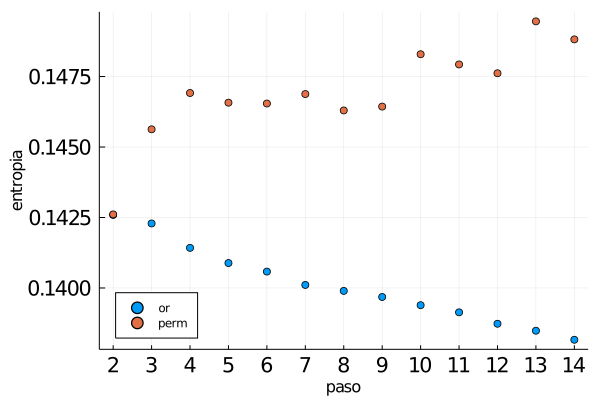

In [56]:
scatter([ listaentropia listaentropia_b], labels = ["or" "perm"], xlabel = "paso", ylabel = "entropia", xtickfontsize=14,ytickfontsize=14, xtick = (1:13, 2:14), legend=:bottomleft)

# Distribución $\Lambda(\tilde P)$

En esta parte, considero los valores de pertenencia para distintas extensiones lineales aleatorias.

**Adendum**: el resultado de esta sección, con respecto a los posets $m^2$ y $m^3$, es como sigue.
Considérense las extensiones lineales calculadas del poset obtenido ---por $m^i$.
Estas extensiones lineales reciben un valor de membresía igual a $0$ para el poset borroso, usando
la lista de puntuaciones con $m^2$.

El proceso fue el siguiente:
1. encontrar un poset crisp
2. calcular extensiones lineales aleatorias de éste, $L_2$ y $L_3$ para los posets $m^2$ y $m^3$, respectivamente.
3. usar $L$ para los posets $m^2$ y $m^3$.

In [15]:
posetsaleatorios_m2 = [caminatale(poset_m2 |> pareja_matrizadyacencia,10^2) for _ in 1:72^2]

5184-element Array{Array{Int64,1},1}:
 [11, 7, 2, 13, 3, 8, 1, 19, 18, 10, 20, 4, 14, 15, 12, 5, 17, 16, 6, 9]
 [11, 7, 2, 13, 3, 8, 1, 19, 18, 10, 20, 4, 14, 15, 12, 5, 17, 16, 6, 9]
 [11, 7, 2, 13, 3, 8, 1, 19, 18, 10, 20, 4, 14, 15, 12, 5, 17, 16, 6, 9]
 [11, 7, 2, 13, 3, 8, 1, 19, 18, 10, 20, 4, 14, 15, 12, 5, 17, 16, 6, 9]
 [11, 7, 2, 13, 3, 8, 1, 19, 18, 10, 20, 4, 14, 15, 12, 5, 17, 16, 6, 9]
 [11, 7, 2, 13, 3, 8, 1, 19, 18, 10, 20, 4, 14, 15, 12, 5, 17, 16, 6, 9]
 [11, 7, 2, 13, 3, 8, 1, 19, 18, 10, 20, 4, 14, 15, 12, 5, 17, 16, 6, 9]
 [11, 7, 2, 13, 3, 8, 1, 19, 18, 10, 20, 4, 14, 15, 12, 5, 17, 16, 6, 9]
 [11, 7, 2, 13, 3, 8, 1, 19, 18, 10, 20, 4, 14, 15, 12, 5, 17, 16, 6, 9]
 [11, 7, 2, 13, 3, 8, 1, 19, 18, 10, 20, 4, 14, 15, 12, 5, 17, 16, 6, 9]
 [11, 7, 2, 13, 3, 8, 1, 19, 18, 10, 20, 4, 14, 15, 12, 5, 17, 16, 6, 9]
 [11, 7, 2, 13, 3, 8, 1, 19, 18, 10, 20, 4, 14, 15, 12, 5, 17, 16, 6, 9]
 [11, 7, 2, 13, 3, 8, 1, 19, 18, 10, 20, 4, 14, 15, 12, 5, 17, 16, 6, 9]
 ⋮
 [11, 7, 2

In [16]:
posetsaleatorios_m3 = [caminatale(poset_m3 |> pareja_matrizadyacencia,10^2) for _ in 1:72^2]

5184-element Array{Array{Int64,1},1}:
 [11, 7, 2, 13, 19, 10, 3, 8, 1, 20, 18, 4, 14, 15, 12, 5, 17, 16, 6, 9]
 [11, 7, 2, 13, 19, 10, 3, 8, 1, 20, 18, 4, 14, 15, 12, 5, 17, 16, 6, 9]
 [11, 7, 2, 13, 19, 10, 3, 8, 1, 20, 18, 4, 14, 15, 12, 5, 17, 16, 6, 9]
 [11, 7, 2, 13, 19, 10, 3, 8, 1, 20, 18, 4, 14, 15, 12, 5, 17, 16, 6, 9]
 [11, 7, 2, 13, 19, 10, 3, 8, 1, 20, 18, 4, 14, 15, 12, 5, 17, 16, 6, 9]
 [11, 7, 2, 13, 19, 10, 3, 8, 1, 20, 18, 4, 14, 15, 12, 5, 17, 16, 6, 9]
 [11, 7, 2, 13, 19, 10, 3, 8, 1, 20, 18, 4, 14, 15, 12, 5, 17, 16, 6, 9]
 [11, 7, 2, 13, 19, 10, 3, 8, 1, 20, 18, 4, 14, 15, 12, 5, 17, 16, 6, 9]
 [11, 7, 2, 13, 19, 10, 3, 8, 1, 20, 18, 4, 14, 15, 12, 5, 17, 16, 6, 9]
 [11, 7, 2, 13, 19, 10, 3, 8, 1, 20, 18, 4, 14, 15, 12, 5, 17, 16, 6, 9]
 [11, 7, 2, 13, 19, 10, 3, 8, 1, 20, 18, 4, 14, 15, 12, 5, 17, 16, 6, 9]
 [11, 7, 2, 13, 19, 10, 3, 8, 1, 20, 18, 4, 14, 15, 12, 5, 17, 16, 6, 9]
 [11, 7, 2, 13, 19, 10, 3, 8, 1, 20, 18, 4, 14, 15, 12, 5, 17, 16, 6, 9]
 ⋮
 [11, 7, 2

Primero vemos como el poset $m^2$ no es compatible con el $m^3$.

In [17]:
poset_m2 |> pareja_matrizadyacencia

20×20 Array{Int64,2}:
 0  0  0  1  1  1  0  0  1  1  0  1  0  1  1  1  1  1  1  1
 1  0  1  1  1  1  0  1  1  1  0  1  1  1  1  1  1  1  1  1
 0  0  0  1  1  1  0  1  1  0  0  1  0  1  1  1  1  1  0  1
 0  0  0  0  1  1  0  0  1  0  0  1  0  1  1  1  1  0  0  0
 0  0  0  0  0  1  0  0  1  0  0  0  0  0  0  1  1  0  0  0
 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  1  1  1  0  1  1  1  0  1  1  1  1  1  1  1  1  1
 0  0  0  1  1  1  0  0  1  0  0  1  0  1  1  1  1  0  0  1
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  1  1  0  0  1  0  0  1  0  1  1  1  1  0  0  1
 1  1  1  1  1  1  1  1  1  1  0  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  1  0  0  1  0  0  0  0  0  0  1  0  0  0  0
 1  0  1  1  1  1  0  1  1  1  0  1  0  1  1  1  1  1  1  1
 0  0  0  0  1  1  0  0  1  0  0  0  0  0  1  1  1  0  0  0
 0  0  0  0  0  1  0  0  1  0  0  0  0  0  0  1  0  0  0  0
 0  0  0  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  1 

In [18]:
countmap([membresia(x, poset_m2|> fuzzy) for x in unique!(posetsaleatorios_m2)])

Dict{Float64,Int64} with 2 entries:
  0.0114171  => 3
  0.00256477 => 11

In [19]:
countmap([membresia(x, poset_m3|> fuzzy) for x in unique!(posetsaleatorios_m2)])

Dict{Float64,Int64} with 2 entries:
  0.00171494 => 11
  0.0086177  => 3

usando la version crisp de $m^3$

In [30]:
countmap([membresia(x, poset_m2|> pareja_matrizadyacencia) for x in unique!(posetsaleatorios_m2)])

Dict{Float64,Int64} with 1 entry:
  1.0 => 14

In [31]:
countmap([membresia(x, poset_m3|> pareja_matrizadyacencia) for x in unique!(posetsaleatorios_m2)])

Dict{Float64,Int64} with 1 entry:
  1.0 => 14

In [33]:
countmap([membresia(x, poset_m2|> pareja_matrizadyacencia) for x in unique!(ranks_univs)])

Dict{Int64,Int64} with 1 entry:
  0 => 365

In [32]:
countmap([membresia(x, poset_m3|> pareja_matrizadyacencia) for x in unique!(ranks_univs)])

Dict{Int64,Int64} with 1 entry:
  0 => 365

... y viceversa.

In [20]:
countmap([membresia(x, poset_m2|> fuzzy) for x in unique!(posetsaleatorios_m3)])

Dict{Int64,Int64} with 1 entry:
  0 => 41

In [21]:
countmap([membresia(x, poset_m3|> fuzzy) for x in unique!(posetsaleatorios_m3)])

Dict{Float64,Int64} with 4 entries:
  0.0118492  => 1
  0.00171494 => 28
  0.0114165  => 8
  0.0086177  => 4

## usando los rankings por puntuacion

In [24]:
countmap([membresia(x, poset_m3|> fuzzy) for x in unique!(ranks_univs)])

Dict{Int64,Int64} with 1 entry:
  0 => 365

In [25]:
countmap([membresia(x, poset_m2|> fuzzy) for x in unique!(ranks_univs)])

Dict{Int64,Int64} with 1 entry:
  0 => 365

In [26]:
countmap([membresia(x, αcut_poset(poset_mn, .7)) for x in unique!(ranks_univs)])

Dict{Real,Int64} with 2 entries:
  0   => 278
  1.0 => 87

In [27]:
countmap([membresia(x, αcut_poset(poset_mn, .6)) for x in unique!(ranks_univs)])

Dict{Real,Int64} with 2 entries:
  0   => 278
  1.0 => 87

In [28]:
countmap([membresia(x, αcut_poset(poset_mn, .5)) for x in unique!(ranks_univs)])

Dict{Real,Int64} with 2 entries:
  0   => 278
  1.0 => 87

In [29]:
countmap([membresia(x, αcut_poset(poset_mn, .4)) for x in unique!(ranks_univs)])

Dict{Real,Int64} with 2 entries:
  0   => 278
  1.0 => 87

Ahora vamos a comparar la compatibilidad entre distintos $\alpha$ cuts

In [96]:
posetsaleatorios_alpha0p5 = [caminatale(αcut_poset(poset_mn, .5),10^2) for _ in 1:72^2]

5184-element Array{Array{Int64,1},1}:
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 4, 9, 12, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 3, 13, 2, 1]
 [

Por lo tanto, los $\alpha$-cut no son compatibles con $m^2$ y $m^3$.

In [97]:
countmap([membresia(x, poset_m2|> fuzzy) for x in unique!(posetsaleatorios_alpha0p5)])

Dict{Int64,Int64} with 1 entry:
  0 => 1088

In [98]:
countmap([membresia(x, poset_m3|> fuzzy) for x in unique!(posetsaleatorios_alpha0p5)])

Dict{Int64,Int64} with 1 entry:
  0 => 1088

Vemos que los $\alpha$-cuts no son compatibles con $\alpha'<\alpha$.

In [105]:
countmap([membresia(x, αcut_poset(poset_mn, .7)) for x in unique!(posetsaleatorios_alpha0p5)])

Dict{Int64,Int64} with 1 entry:
  0 => 1088

In [104]:
countmap([membresia(x, αcut_poset(poset_mn, .6)) for x in unique!(posetsaleatorios_alpha0p5)])

Dict{Int64,Int64} with 1 entry:
  0 => 1088

In [99]:
countmap([membresia(x, αcut_poset(poset_mn, .5)) for x in unique!(posetsaleatorios_alpha0p5)])

Dict{Float64,Int64} with 1 entry:
  1.0 => 1088

In [100]:
countmap([membresia(x, αcut_poset(poset_mn, .4)) for x in unique!(posetsaleatorios_alpha0p5)])

Dict{Float64,Int64} with 1 entry:
  1.0 => 1088

In [101]:
countmap([membresia(x, αcut_poset(poset_mn, .3)) for x in unique!(posetsaleatorios_alpha0p5)])

Dict{Float64,Int64} with 1 entry:
  1.0 => 1088

In [102]:
countmap([membresia(x, αcut_poset(poset_mn, .1)) for x in unique!(posetsaleatorios_alpha0p5)])

Dict{Float64,Int64} with 1 entry:
  1.0 => 1088

Ahora vamos a comparar la compatibilidad entre distintos $\alpha$ cuts

In [96]:
posetsaleatorios_alpha0p5 = [caminatale(αcut_poset(poset_mn, .5),10^2) for _ in 1:72^2]

5184-element Array{Array{Int64,1},1}:
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 4, 9, 12, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 3, 13, 2, 1]
 [

In [106]:
posetsaleatorios_alpha0p67 = [caminatale(αcut_poset(poset_mn, .67),10^2) for _ in 1:72^2]|>unique!;

In [121]:
posetsaleatorios_alpha0p78 = [caminatale(αcut_poset(poset_mn, .78),10^2) for _ in 1:72^2]|>unique!;

In [103]:
posetsaleatorios_alpha0p5

1088-element Array{Array{Int64,1},1}:
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 4, 9, 12, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 3, 13, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [72, 69, 68, 67, 66, 65, 64, 26, 22, 15  …  14, 12, 9, 4, 37, 23, 13, 3, 2, 1]
 [

Por lo tanto, los $\alpha$-cut no son compatibles con $m^2$ y $m^3$.

In [97]:
countmap([membresia(x, poset_m2|> fuzzy) for x in unique!(posetsaleatorios_alpha0p5)])

Dict{Int64,Int64} with 1 entry:
  0 => 1088

In [98]:
countmap([membresia(x, poset_m3|> fuzzy) for x in unique!(posetsaleatorios_alpha0p5)])

Dict{Int64,Int64} with 1 entry:
  0 => 1088

Vemos que los $\alpha$-cuts no son ---necesariamente--- compatibles con $\alpha'<\alpha$.

In [114]:
countmap([membresia(x, αcut_poset(poset_mn, .8)) for x in unique!(posetsaleatorios_alpha0p67)])

Dict{Int64,Int64} with 1 entry:
  0 => 1318

In [115]:
countmap([membresia(x, αcut_poset(poset_mn, .7)) for x in unique!(posetsaleatorios_alpha0p67)])

Dict{Int64,Int64} with 1 entry:
  0 => 1318

In [116]:
countmap([membresia(x, αcut_poset(poset_mn, .6)) for x in unique!(posetsaleatorios_alpha0p67)])

Dict{Int64,Int64} with 1 entry:
  0 => 1318

In [117]:
countmap([membresia(x, αcut_poset(poset_mn, .5)) for x in unique!(posetsaleatorios_alpha0p67)])

Dict{Int64,Int64} with 1 entry:
  0 => 1318

In [118]:
countmap([membresia(x, αcut_poset(poset_mn, .4)) for x in unique!(posetsaleatorios_alpha0p67)])

Dict{Int64,Int64} with 1 entry:
  0 => 1318

In [119]:
countmap([membresia(x, αcut_poset(poset_mn, .3)) for x in unique!(posetsaleatorios_alpha0p67)])

Dict{Int64,Int64} with 1 entry:
  0 => 1318

In [120]:
countmap([membresia(x, αcut_poset(poset_mn, .1)) for x in unique!(posetsaleatorios_alpha0p67)])

Dict{Int64,Int64} with 1 entry:
  0 => 1318

Vemos que los $\alpha$-cuts no son ---necesariamente--- compatibles con $\alpha'<\alpha$.

In [129]:
countmap([membresia(x, αcut_poset(poset_mn, .9)) for x in unique!(posetsaleatorios_alpha0p78)])

Dict{Int64,Int64} with 1 entry:
  0 => 563

In [122]:
countmap([membresia(x, αcut_poset(poset_mn, .8)) for x in unique!(posetsaleatorios_alpha0p78)])

Dict{Float64,Int64} with 1 entry:
  1.0 => 563

In [123]:
countmap([membresia(x, αcut_poset(poset_mn, .7)) for x in unique!(posetsaleatorios_alpha0p78)])

Dict{Float64,Int64} with 1 entry:
  1.0 => 563

In [124]:
countmap([membresia(x, αcut_poset(poset_mn, .6)) for x in unique!(posetsaleatorios_alpha0p78)])

Dict{Float64,Int64} with 1 entry:
  1.0 => 563

In [125]:
countmap([membresia(x, αcut_poset(poset_mn, .5)) for x in unique!(posetsaleatorios_alpha0p78)])

Dict{Float64,Int64} with 1 entry:
  1.0 => 563

In [126]:
countmap([membresia(x, αcut_poset(poset_mn, .4)) for x in unique!(posetsaleatorios_alpha0p78)])

Dict{Float64,Int64} with 1 entry:
  1.0 => 563

In [127]:
countmap([membresia(x, αcut_poset(poset_mn, .3)) for x in unique!(posetsaleatorios_alpha0p78)])

Dict{Float64,Int64} with 1 entry:
  1.0 => 563

In [128]:
countmap([membresia(x, αcut_poset(poset_mn, .1)) for x in unique!(posetsaleatorios_alpha0p78)])

Dict{Float64,Int64} with 1 entry:
  1.0 => 563

## de nuevo permutaciones

In [153]:
puntucionpermutada = permpuntuaciones(puntuaciones, 1);

In [154]:
posetfaux_mn = puntucionpermutada |> fuzzy;

In [155]:
posetsfauxaleatorios_alpha0p78 = [caminatale(αcut_poset(posetfaux_mn, .78),10^2) for _ in 1:72^2]|>unique!;

In [156]:
countmap([membresia(x, αcut_poset(poset_mn, .9)) for x in unique!(posetsfauxaleatorios_alpha0p78)])

Dict{Int64,Int64} with 1 entry:
  0 => 662

In [157]:
countmap([membresia(x, αcut_poset(poset_mn, .8)) for x in unique!(posetsfauxaleatorios_alpha0p78)])

Dict{Int64,Int64} with 1 entry:
  0 => 662

In [158]:
countmap([membresia(x, αcut_poset(poset_mn, .7)) for x in unique!(posetsfauxaleatorios_alpha0p78)])

Dict{Int64,Int64} with 1 entry:
  0 => 662

In [159]:
countmap([membresia(x, αcut_poset(poset_mn, .6)) for x in unique!(posetsfauxaleatorios_alpha0p78)])

Dict{Int64,Int64} with 1 entry:
  0 => 662

In [160]:
countmap([membresia(x, αcut_poset(poset_mn, .5)) for x in unique!(posetsfauxaleatorios_alpha0p78)])

Dict{Int64,Int64} with 1 entry:
  0 => 662

In [161]:
countmap([membresia(x, αcut_poset(poset_mn, .4)) for x in unique!(posetsfauxaleatorios_alpha0p78)])

Dict{Int64,Int64} with 1 entry:
  0 => 662

In [162]:
countmap([membresia(x, αcut_poset(poset_mn, .3)) for x in unique!(posetsfauxaleatorios_alpha0p78)])

Dict{Int64,Int64} with 1 entry:
  0 => 662

In [163]:
countmap([membresia(x, αcut_poset(poset_mn, .1)) for x in unique!(posetsfauxaleatorios_alpha0p78)])

Dict{Int64,Int64} with 1 entry:
  0 => 662